In [7]:
import pandas as pd
import numpy as np

# To-do Tasks
# Problem - 1: Perform a classification task with knn from scratch

# 1. Load the Dataset:
data = pd.read_csv("diabetes_.csv")
data.head()       # display first 5 rows
data.info()       # look for all information of the dataset (data types, total no. of rows, column names, null values, etc.)
data.describe()   # gives mean, min and max values of each feature


# 2. Handle Missing Data:
data.isnull().sum()    # total number of null values


# 3. Feature Engineering:
X = data.drop(columns=['Outcome']).values               # remove the Outcome column, convert into numpy array, contains only input features now
Y = data['Outcome'].values                              # convert the Outcome column values into numpy array
def train_test_split(X, Y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)                           # set random seed
  indices = np.arange(X.shape[0])                       # create an array of indices from 0 to number of samples
  np.random.shuffle(indices)                            # shuffling the indices array
  split_index = int(len(X) * (1 - test_size))           # setting the index where the split should occur
  train_indices = indices[:split_index]                 # select indices for training data
  test_indices = indices[split_index:]                  # select indices for testing data
  X_train, X_test = X[train_indices], X[test_indices]   # create training and testing feature sets using the selected indices
  Y_train, Y_test = Y[train_indices], Y[test_indices]   # create training and testing target label sets using the same indices
  return X_train, X_test, Y_train, Y_test


# 4. Implement KNN:
def euclid_distance(point1, point2):                       # compute distance using euclidean distance formula
  if point1.shape != point2.shape:                         # check if the dimensions match or not
    raise ValueError("Points dimension must be same")
  else:
    return np.sqrt(np.sum((point1 - point2) ** 2))         # find out the euclidean distance

def knn_single_query(query, X_train, Y_train, k=5):        # algorithm for predicting class for a single query
  distances = [euclid_distance(query, x) for x in X_train] # compute distances from query to all training points
  nearest_indices = np.argsort(distances)[:k]              # sort distances from smallest to largest and get indices of k nearest points
  nearest_labels = Y_train[nearest_indices]                # get the labels of k nearest neighbors
  prediction = np.bincount(nearest_labels).argmax()        # return the most label with majority (0 or 1)
  return prediction

def knn_test_sample(X_test , X_train,Y_train, k=5):        # algorithm for predicting class for all test sample
  predictions = [knn_single_query(x, X_train, Y_train, k) for x in X_test] # loop through every test sample x and call knn_single_query for each
  return np.array(predictions)                             # return the array of predictions

def calculate_accuracy (Y_test,Y_pred):     # calculation accuracy of the outcome or algorithm
  correct = np.sum(Y_test == Y_pred)        # sum up total correct predictions
  total = len(Y_pred)
  return (correct / total) * 100

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)   # split the dataset into training and testing sets
knn_prediction = knn_test_sample(X_test[:20], X_train, Y_train, k=17) # predict the classes
actual_label = Y_test[:20]                                 # to compare with the predicted labels for evaluation

print("KNN algorithm prediction: ",knn_prediction)
print("Actual Label: ",actual_label)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
KNN algorithm prediction:  [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Label:  [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [31]:
# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
X_scaled = (X - X.min()) / (X.max() - X.min())      # scale every feature to 0–1 range (min-max scaling)

Xs_train, Xs_test, Y_train, Y_test = train_test_split(X_scaled, Y)           # split the scaled dataset into training and testing sets

scaled_prediction = knn_test_sample(Xs_test[:20], Xs_train, Y_train, k = 17) # predict the class labels
actual_label_scale = Y_test[:20]                    # to compare with the predicted labels for evaluation

# 2. Comparative Analysis: Compare the Results:
print("KNN algorithm prediction: ",scaled_prediction)
print("Actual Label: ",actual_label_scale)
# this shows a simple visual comparison of predictions vs actual outcomes

KNN algorithm prediction:  [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Label:  [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


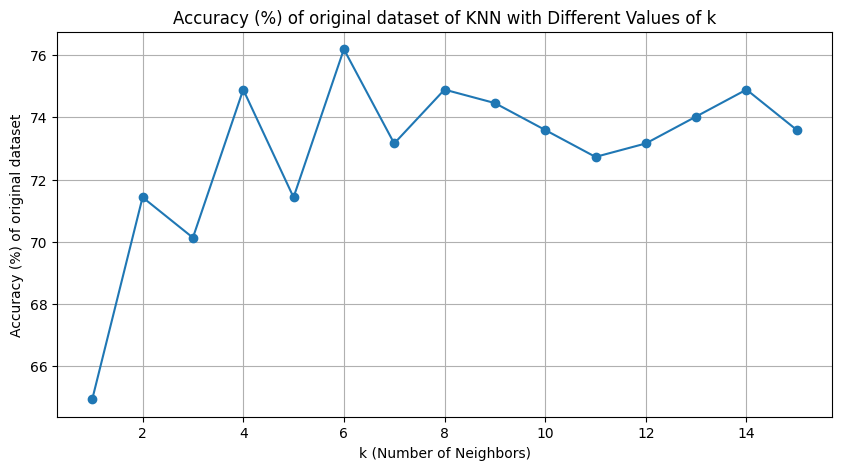

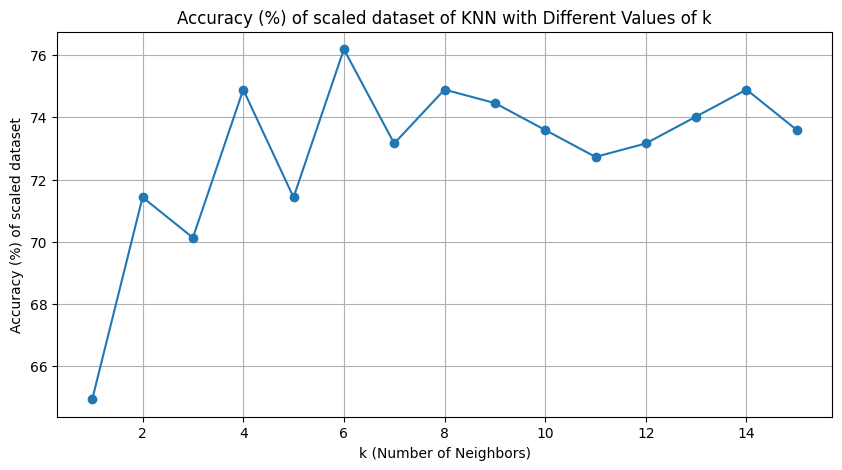

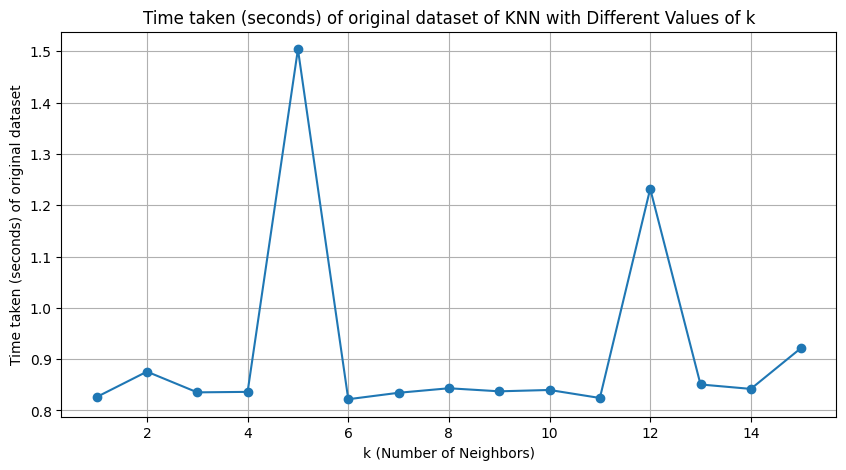

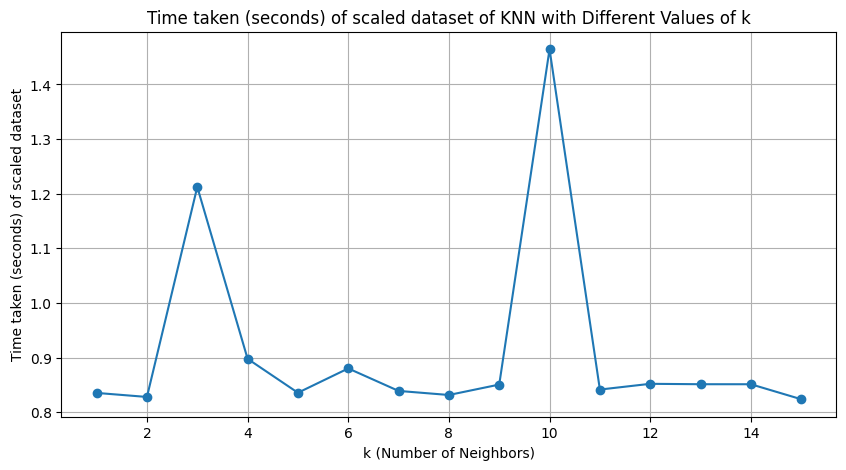

In [41]:
from timeit import timeit
import matplotlib.pyplot as plt

# Problem - 3 - Experimentation with k:
# 1. Vary the number of neighbors - k:

def exp_knn_k_values(X_train, Y_train, X_test, Y_test, k_values):
   accuracies = {}       # dictionary to store accuracy of each k
   times = {}            # dictionary to store time taken for prediction for each k

   for k in k_values:             # loop through each values of k in k_values
    prediction = knn_test_sample(X_test, X_train, Y_train, k)     # predict labels for all test samples using KNN
    times[k] = timeit(lambda: knn_test_sample(X_test, X_train, Y_train, k), number=1) # measures time taken to make predictions for this k and stores it
    accuracy = calculate_accuracy(Y_test, prediction)             # compute accuracy for k
    accuracies[k] = accuracy      # storing accuracy of k in the accuracies dictionaries
   return accuracies, times      # accuracies = accuracy of k, times = time took for the function to run

# 2. Visualize the Results:
def plot_diff_k(items, k_values, description):                   # create line graph
  plt.figure(figsize=(10,5))                                     # set figure size
  plt.plot(k_values, list(items.values()), marker='o')           # plot line with markers
  plt.xlabel('k (Number of Neighbors)')                          # x-axis label
  plt.ylabel(description)                                        # y-axis label
  plt.title(f'{description} of KNN with Different Values of k')  # plot title
  plt.grid(True)                                                 # add grid for readability
  plt.show()                                                     # display the plot

k_values=range(1,16)
accuracy, timetaken = exp_knn_k_values(X_train, Y_train, X_test, Y_test, k_values) # returns accuracy and time taken for each k
scaled_accuracy, scaled_timetaken = exp_knn_k_values(Xs_train, Y_train, Xs_test, Y_test, k_values) # uses scaled feature but label remains same


plot_diff_k(accuracy, k_values, "Accuracy (%) of original dataset")               # accuracy of original dataset

plot_diff_k(scaled_accuracy, k_values, "Accuracy (%) of scaled dataset")          # accuracy of scaled dataset

plot_diff_k(timetaken, k_values, "Time taken (seconds) of original dataset")      # time taken of original dataset

plot_diff_k(scaled_timetaken, k_values, "Time taken (seconds) of scaled dataset") # time taken of scaled dataset